# WSI - Ćwiczenie 3
*Tomasz Żebrowski*

Implementację stanowiącą rozwiązanie zadania dzielę na dwie części. Pierwsza z nich realizuje ogólną wersję algorytmu minimax z przycinaniem alfabeta (plik `minimax.py`), natomiast druga odpowiada za logikę związaną z omawianą grą (`tictactoe.py`).

W pliku `minimax.py` zaimplementowano następujące funkcje:
- `minimax` - algorytm minimax bez przycinania α − β. Jako parametry przyjmuje:
    - `game` - obiekt gry, dla której wywoływawny jest algorytm
    - `s` - aktualny stan gry
    - `d` - głębokość przeszukiwania
    - `is_max_move` - informacja, czy gracz *max* wykonuje dany ruch
- `alfabeta` - algorytm minimax z przycinaniem α − β. Parametry takie same jak minimax, a także `a`, `b` - wartości α i β.
- `choose_next_move` - obudowuje funkcję `alfabeta`. Parametry takie same jak `minimax`. Zwraca najlepszy możliwy do wykonania ruch w danym stanie.

W pliku `tictactoe.py` zaimplementowano następujące klasy:
- `TicTacToe` - realizuje logikę gry w kółko i krzyżyk na planszy o wymiarach *N*x*N*.
- `TicTacToeModified` - dodatkową zmianą w tym wariancie gry jest to, że do zwycięstwa wyznaczy ułożyć symbole w linię o długości *M*.

Do testowania zaimplementowanego algorytmu w starciu z człowiekiem napisałem również proste gui dla gry na planszy 5x5 z liczbą wymaganych do zwycięstwa symboli w linii *M*=4. Aplikacja zrealizowana jest w pliku `gui.py`

W ramach pierwszego eksperymentu, sprawdzam czas wykonania dla algorytmów minimax oraz minimax z przycinaniem α − β dla ruchu pewnego otwierającego na planszy 6x6 i głębokości przeszukiwania 4. Spodziewam się, że drugi algorytm wykaże się znacznie lepiej.

In [10]:
from tictactoe import TicTacToe
from minimax import minimax, alfabeta
import time
import numpy as np

game = TicTacToe(4)
s = np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 0]])

start = time.process_time()
minimax(game, s, 4, True)
minimax_time = time.process_time() - start
print("Czas wykonania minimax:")
print(minimax_time)

start = time.process_time()
alfabeta(game, s, 4, True)
alfabeta_time = time.process_time() - start
print("Czas wykonania alfabeta:")
print(alfabeta_time)

Czas wykonania minimax:
3.181827002000034
Czas wykonania alfabeta:
0.08212972299998


Widać, że czas wykonania algorytmu `alfabeta` jest rzeczywiście znacznie mniejszy. Wiedząc to, we wszystkich dalszych rozważaniach wykorzystuję właśnie ten algorytm. 

### Kółko i krzyżyk *N*x*N*
Problem z klasyczną grą w kółko i krzyżyk jest następujący: W sytuacji gdy obaj gracze grają optymalnie, gra zawsze kończy się remisem. Aby sprawdzić eksperymentalnie tę tęzę, prowadzę serię rozgrywek i zliczam jaka część z nich zakończy się remisem.

In [13]:
from tournament import play_game
total_games = 0
total_draws = 0
for k in range(10):
    for n in [3, 4, 5]:
        for d1 in [0, 1, 2]:
            for d2 in [0, 1, 2]:
                if play_game(TicTacToe(n), d1, d2) == 0:
                    total_draws += 1
                total_games += 1

In [14]:
print("Łącznie gier:\t", total_games)
print("Łącznie remisów:\t", total_draws)
print("Remisy: ", 100 * total_draws/ total_games, "%")

Łącznie gier:	 270
Łącznie remisów:	 163
Remisy:  60.370370370370374 %


Nie jest aż tak źle jak się spodziewałem. Mimo to, blisko dwie trzecie remisów to moim zdaniem za dużo, by przeprowadzić prawdziwie emocjonujący turniej. Aby temu zaradzić, w dalszych rozważaniach zostanie wzięta pod uwagę wersja gry nieco zmodyfikowana, w której wystarczy ułożyć w linię *m* znaków. Dla wariantu 5x5, m=4 prowadzę podobny eksperyment.

In [15]:
from tictactoe import TicTacToeModified
total_games = 0
total_draws = 0
for k in range(10):
    for d1 in [0, 1, 2]:
        for d2 in [0, 1, 2]:
            if play_game(TicTacToeModified(5, 4), d1, d2) == 0:
                total_draws += 1
            total_games += 1

In [19]:
print("Łącznie gier:\t", total_games)
print("Łącznie remisów:\t", total_draws)
print("Remisy: ", 100 * total_draws/ total_games, "%")

Łącznie gier:	 90
Łącznie remisów:	 6
Remisy:  6.666666666666667 %


Jak widać, w omawianym wariancie remisy zdarzają się znacznie (niemal dziesięciokrotnie) rzadziej niż w standardowej grze. Z tego powodu, to w nim przeprowadzony zostanie turniej.

### Turniej w kółko i krzyżyk 5x5, m=4
W turnieju bierze udział czterech graczy, każdy z inną głębokością przeszukiwania z zakresu 0-3. Gracze dobierani są losowo w pary, w których konkurują o przejście do rozgrywki finałowej. Zwycięzca rozgrywki finałowej wygrywa turniej. W przypadku remisu, za przegranego uznany zostaje gracz, który dysponował pierwszym ruchem. Rzecz jasna, w celu uzyskania danych pozwalających na wyciągnięcie ogólnych wniosków, przeprowadzam kilkaset takich turniejów.

Pierwszą rzeczą, którą chcę sprawdzić jest to, który z graczy wygrał najwięcej turniejów. Poniższa tabela prezentuje wyniki:

In [25]:
results = np.array([0, 0, 0, 0])
with open("experiment-data/tournament-n5-m4.out", "r") as file:
    for line in file:
        results[int(line)] += 1
total = sum(results)
results_normalized = results/total
print(results)
print(results_normalized)

[  3   5  20 567]
[0.00504202 0.00840336 0.03361345 0.95294118]


| Gracz                 | 0     | 1     | 2     | 3      |
|-----------------------|-------|-------|-------|--------|
| Zwycięstwa            | 3     | 5     | 20    | 567    |
| Zwycięstwa procentowo | 0.50% | 0.84% | 3.36% | 95.30% |

Od razu rzuca się w oczy miażdżąca przewaga gracza o głębokości przeszukiwania 3. Zgodnie z oczekiwaniami znacznie przewyższył on innych graczy. Mimo to, nawet graczowi 0 udało się wygrać kilka razy. Zawdzięcza on to szczęśliwemu przydziałowi przeciwników oraz prawdopodobnie błędom innych graczy.

Ten rezultat, rzecz jasna, nie jest ani trochę zadziwiający. Być może dokładniejsza analiza wykonanych rozgrywek pokaże coś ciekawego. Oprócz zwycięzcy każdego turnieju, zapisywałem również ile razy każdy graczy wygrał z każdym innym graczem. Wyniki te najlepiej zaprezentować na macieży kwadratowej, jak poniżej:

[[  0. 119.  80.   0.]
 [ 86.   0.  77.   8.]
 [137. 115.   0.  20.]
 [369. 356. 418.   0.]]


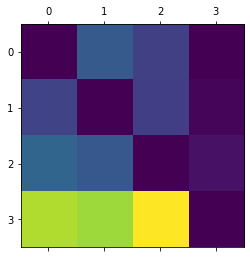

In [16]:
import numpy as np
import matplotlib.pyplot as plt
wins_matrix = np.loadtxt("experiment-data/wins-n5-m4.out", delimiter=",")
plt.matshow(wins_matrix)
print(wins_matrix)

Zasada odczytywania danych z tych macierzy: Komórka zawiera liczbę zwycięstw gracza o głębokości równej numerowi wiersza z graczem o głębokości równej numerowi kolumny. Widać, że na diagonala macierzy jest wypełniona zerami, ponieważ żaden z graczy nie grał sam ze sobą.

Powyższa macierz rodzi we mnie wątpliwość - Dlaczego gracz 3 wygrał z graczem 2 więcej razy niż z graczem 0? Odpowiedź na to pytanie nasuwa się po chwili - ze względu na strukturę turnieju, gracz 3 grał z graczem 2 znacznie więcej razy. Aby rozpatrywać rysunek pod względem przewagi danego gracza nad innym, należy znormalizować komórki względem łącznej liczby rozgrywek między danymi dwoma graczami.

Znormalizowane dane przedstawiam poniżej:

[[0.         0.5804878  0.36866359 0.        ]
 [0.4195122  0.         0.40104167 0.02197802]
 [0.63133641 0.59895833 0.         0.0456621 ]
 [1.         0.97802198 0.9543379  0.        ]]


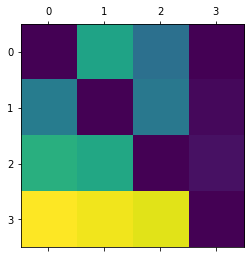

In [26]:
win_count = np.zeros((4))
for i in range(4):
    win_count[i] = sum(wins_matrix[:, i]) + sum(wins_matrix[i, :])
win_count

wins_matrix_normalized = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        if wins_matrix[j, i] == 0:
            wins_matrix_normalized[j, i] = 0
            continue
        wins_matrix_normalized[j, i] = wins_matrix[j, i] / (wins_matrix[j, i] + wins_matrix[i, j])
plt.matshow(wins_matrix_normalized)
print(wins_matrix_normalized)


Komórki macierzy oznaczają teraz wyznaczone eksperymentalnie prawdopodobieństwo, że gracz o głębokości równej numerowi wiersza wygra z graczem o głębokości równej numerowi kolumny. Ten rysunek również potwierdza ogromną przewagę gracza o głębokości przeszukania 3. W rzeczy samej wygrał on znaczącą większość rozgrywek, w których wziął udział. W szczególności, na przestrzeni 369 gier nie przegrał ani razu z graczem o głębokości przeszukania 0.

Różnice między pozostałymi graczami są nieco mniej zauważalne, ale wciąż obecne. Po pierwsze, gracz 2 jest znacząco lepszy od gracza 1 i gracza 0, czego  można było się spodziewać. Co zaskakujące, gracz o głębokości przeszukiwania0 okazał się minimalnie lepszy od gracza o głębokości przeszukiwania 1.

Powyższe eksperymenty sprawiają, że algorytm wydaje się działać obiecująco. Większa głębokość przeszukania skutkuje znacznie lepiej wypadającym graczem. Ostatnim testem, być może najistotniejszym, jest jednak starcie stworzonego algorytmu z człowiekiem. Plik `gui.py` realizuję interfejs użytkownika z grą przeciwko graczowi o głębokości przeszukania 3. Muszę przyznać, że algorytm wygrał ze mną wielokrotnie.